# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [2]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
from HouseholdSpecializationModel import HouseholdSpecializationModelClass
model = HouseholdSpecializationModelClass()

# Question 1

**Explain how you solve the model**

In [ ]:
# code for solving the model (remember documentation and comments)

# a = np.array([1,2,3])
# b = inauguralproject.square(a)
# print(b)

In [3]:
# Making the varying alpha and sigma
alpha_list = [0.25, 0.5, 0.75]
sigma_list = [0.5, 1.0, 1.5]

# Making a for loop for each combination of alpha and sigma and printing the results
for alpha in alpha_list:    
    for sigma in sigma_list:
        # assigning the different value to alpha and sigma
        model.par.alpha = alpha
        model.par.sigma = sigma

        # Solving the model with the new different values of alpha and sigma
        opt = model.solve_discrete()

        # Print results
        print(f"alpha = {alpha:.2f} and sigma = {sigma} | HF/HM = {opt.HF:.1f}/{opt.HM:.1f} = {opt.HF/opt.HM:.2f}")

c:\Users\Jonathan Høgh Hansen\Desktop\projects-2023-3500\inauguralproject\HouseholdSpecializationModel.py:62: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha)*HM**((par.sigma-1)/par.sigma)+par.alpha*HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


alpha = 0.25 and sigma = 0.5 | HF/HM = 3.0/5.5 = 0.55
alpha = 0.25 and sigma = 1.0 | HF/HM = 2.0/6.5 = 0.31
alpha = 0.25 and sigma = 1.5 | HF/HM = 1.5/7.0 = 0.21
alpha = 0.50 and sigma = 0.5 | HF/HM = 4.5/4.5 = 1.00
alpha = 0.50 and sigma = 1.0 | HF/HM = 4.5/4.5 = 1.00
alpha = 0.50 and sigma = 1.5 | HF/HM = 4.5/4.5 = 1.00
alpha = 0.75 and sigma = 0.5 | HF/HM = 5.5/3.0 = 1.83
alpha = 0.75 and sigma = 1.0 | HF/HM = 6.5/2.0 = 3.25
alpha = 0.75 and sigma = 1.5 | HF/HM = 7.0/1.5 = 4.67


# Question 2

Explain your code and procedure

Text(0.5, 1.0, 'Relative hours working at home against relative wages for varying $w_F$')

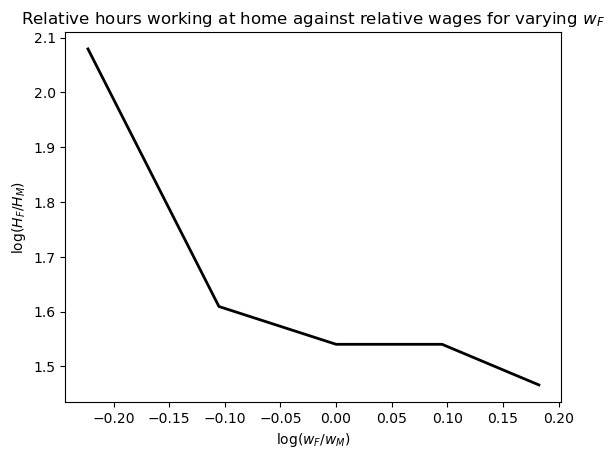

In [16]:
# Defining female wages
wf = model.par.wF_vec

# Taking log to female wages
log_wf = np.log(wf)

# 3. Create an empty array to store the optimal labor supply
temp_ratio= np.zeros_like(wf)

# Making a for loop for different female wages
for i, wage in enumerate(wf):
    model.par.wF = wage
    opt = model.solve_discrete()
    ratio = opt.HF/opt.HM
    temp_ratio[i]=ratio

# 6. Plot the results
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(log_wf, np.log(temp_ratio), color='black', lw=2) # the female wage is equal to the relative becuase wM = 1
plt.xlabel("log($w_F/w_M$)")
plt.ylabel("log($H_F/H_M$)")
plt.title("Relative hours working at home against relative wages for varying $w_F$")

# Question 3

Explain your code and procedure

In [ ]:
# code

ADD CONCISE CONLUSION.